In [81]:
import cv2
from matplotlib import pyplot as plt

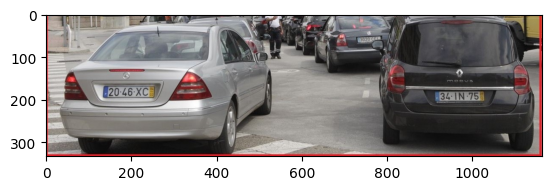

In [82]:
# read the data and save it to img
img = cv2.imread('image3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

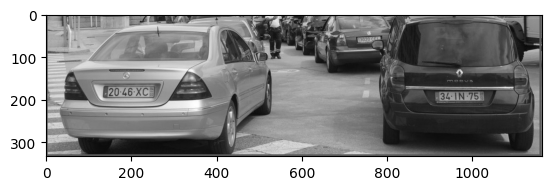

In [83]:
# convert the image to grayscale using cvtColor with 2 arguments which are the image and the color space (blue green red to gray)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show the image using matplotlib
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

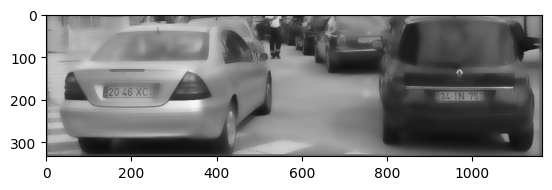

In [84]:
# apply bilateral filter to the image
bilateral  = cv2.bilateralFilter(gray, 25, 50, 25)
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))

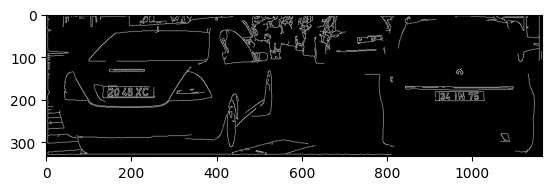

In [85]:
# apply the canny edge detection to the image.
canny_bilateral = cv2.Canny(bilateral, 50, 250)
# show the canny edge detection image using matplotlib
plt.imshow(cv2.cvtColor(canny_bilateral, cv2.COLOR_BGR2RGB))

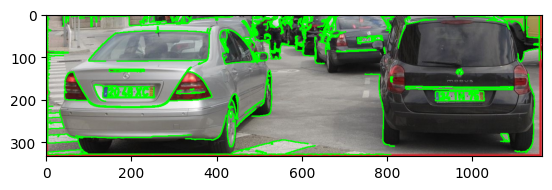

In [86]:
# create a copy of the original image to draw the contours on it.
img_copy = img.copy()
# find the contours of the canny edge detection image.
cnt_canny_bilateral, _ = cv2.findContours(canny_bilateral.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# draw the contours on the copy of the original image.
cv2.drawContours(img_copy, cnt_canny_bilateral, -1, (0, 255, 0), 2)
# show the image with the contours using matplotlib
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

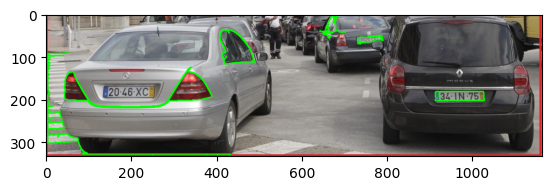

In [87]:
# create a copy of the original image to draw the top 10 contours on it.
img_copy = img.copy()
# sort the contours based on their area and get the top 10 contours.
cnt_canny_bilateral = sorted(cnt_canny_bilateral, key=cv2.contourArea, reverse=True)[:10]
# draw the contours on the copy of the original image.
cv2.drawContours(img_copy, cnt_canny_bilateral, -1, (0, 255, 0), 2)
# show the image with the contours using matplotlib
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

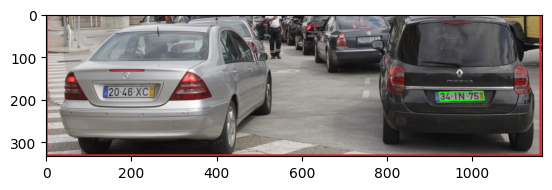

In [88]:
# create a copy of the original image to draw the final contours on it.
img_copy = img.copy()

# loop over the contours.
for c in cnt_canny_bilateral:
    # get the perimeter of the contour.
    contour_perimeter = cv2.arcLength(c, True)
    # approximate the contour to a polygon.
    approx = cv2.approxPolyDP(c, 0.02 * contour_perimeter, True)
    # if the approximated contour has 4 points, then we can assume that we have found the target.
    if len(approx) == 4:
        # save the target contour.
        cv2.drawContours(img_copy, [approx], -1, (0, 255, 0), 2)

# show the image with the contours using matplotlib
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))